##### We train model to recognise single fruit, 
##### model is abridged version of VGG16, https://datagen.tech/guides/computer-vision/vgg16/
#####
##### After model is trained , we check accuracy
#####
##### Then we apply R CNN approach: picture of choice is broken into multiple sub pics(proposals)
#####  and we employ previously trained model to check if sub pic contains apple
#####
##### Current implementation does not require manual labelling

https://towardsdatascience.com/r-cnn-fast-r-cnn-faster-r-cnn-yolo-object-detection-algorithms-36d53571365e

https://www.analyticsvidhya.com/blog/2022/02/blood-cell-detection-in-image-using-naive-approach/


In [1]:
# upload libraries to prepare data
import os
import numpy as np
import cv2

##### As first step we upload data from Train folder to design a model which
##### can recognise a sigle apple

In [2]:
# lists to store pixels and classes
img_data_array=[]
class_name=[]

# values to set height and width to each picture
IMG_HEIGHT = 224
IMG_WIDTH = 224

# location of folders with training data
folder_train = r"D:\0_Desctop_Files\Learning\UTM_Project\1_Prototype\Train"

In [3]:
# verify location
folder_train

'D:\\0_Desctop_Files\\Learning\\UTM_Project\\1_Prototype\\Train'

In [4]:
## import pictures and generate labels to train model

img_data_array=[] # store pixels 
class_name=[] # store classes

for dir1 in os.listdir(folder_train): # loop through files in each folder
    for dir2 in os.listdir ( os.path.join(folder_train, dir1) ):
            
        image_path= os.path.join(folder_train, dir1,  dir2)

        image= cv2.imread( image_path, cv2.IMREAD_COLOR) # import pixels of picture
        
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) # make sure that scheme is RGB
        
        if dir1.split("_")[1]=="y": # if file with pictures contains "y" in name , then its 1, red apple, 0 otherwise
            class_name.append(1)
            image = cv2.copyMakeBorder(image, 20, 20, 20, 20, cv2.BORDER_CONSTANT, None, value=[255, 255, 255] )
               # function adds 20 pixelf of white padding to picture with apple
        else:
            class_name.append(0)
            
        
        image=cv2.resize(image, (IMG_HEIGHT, IMG_WIDTH), # make all pictures standard
                         interpolation = cv2.INTER_AREA)
       
        img_data_array.append(image) # append each picture to single structure
       

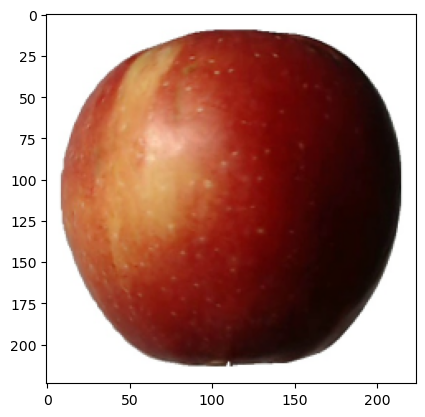

In [5]:
import matplotlib.pyplot as plt
plt.imshow( img_data_array[1] ) # debug

In [6]:
img_data_array[0].shape

(224, 224, 3)

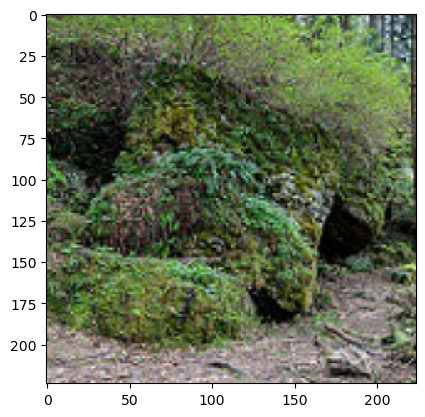

In [7]:
plt.imshow( img_data_array[3000] )  # debug

In [8]:
# generate train and test datasets 
x_train = np.array( img_data_array )
y_train = np.array(class_name)

In [9]:
# delete unused variables
del img_data_array , class_name

In [10]:
x_train = x_train.astype('float32') # to numeric type
x_train /= 255

In [11]:
x_train.shape # debug

(5160, 224, 224, 3)

In [12]:
y_train.shape

(5160,)

In [13]:
## we want class of interest to be more than 20%
sum(y_train) / y_train.shape[0]

0.47810077519379846

In [14]:
y_train

array([1, 1, 1, ..., 0, 0, 0])

##### Because R CNN operates over sub pics of main picture(proposals), and the respective sub pics can contain small part of apple,
##### we need to train model to treat parts of apple as NOT apple, therefore 0
##### Below we generate synthetic data for training

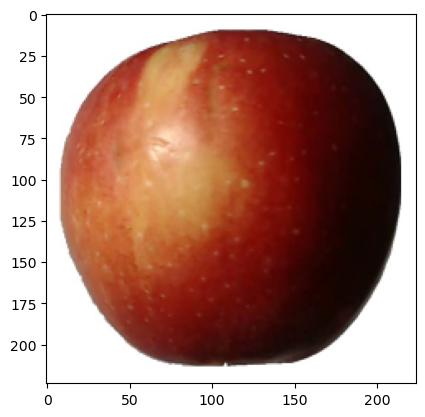

In [15]:
########### Continue, we shoudl generate dataset with apple parts 
### normalised to models input
img_del  = x_train[0]
plt.imshow( img_del )

In [16]:
# manually extract sub pics , we should  generate 
# coordinates for 9 sub pics
height = int( IMG_HEIGHT / 3 ) # ( 3 * 3 = 9 pics )
width = int( IMG_WIDTH / 3 )
height,width # debug

(74, 74)

In [17]:
#### Now we set coordinates and implement script over 1 picture
buf_del   =  x_train[0][0:width , 0:height]
buf_del # debug

array([[[1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        ...,
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ]],

       [[1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        ...,
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ]],

       [[1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        ...,
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ]],

       ...,

       [[1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        [1.        , 1

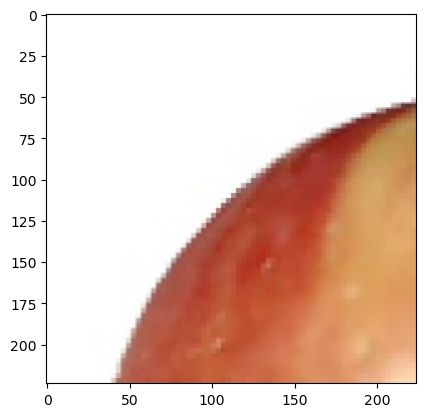

In [18]:
# we expect to get sub pic of apples photo
buf_del = cv2.resize(buf_del, (IMG_HEIGHT, IMG_WIDTH), # make all pictures standard
                         interpolation = cv2.INTER_AREA)

plt.imshow(buf_del ) # debug

In [19]:
#### We would create coordinates for each piece out of 9 and would sample 
#### 1 sub pic from each downloaded picture of apple
x_start = np.arange( start = 0 , stop = img_del.shape[0] -  width , step = width)
y_start = x_start.copy()

In [20]:
x_start , y_start # debug

(array([  0,  74, 148]), array([  0,  74, 148]))

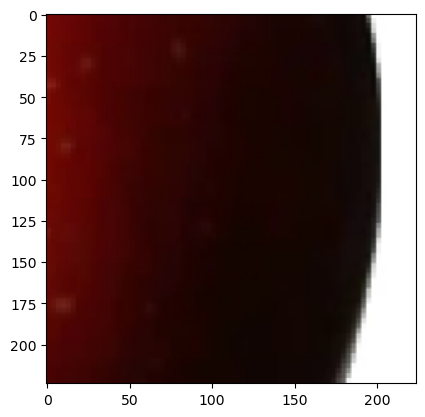

In [21]:
# debug
buf_del =  x_train[0][ x_start[1]:(x_start[1]+width) , y_start[2]:(y_start[2]+height) ]
buf_del = cv2.resize(buf_del, (IMG_HEIGHT, IMG_WIDTH), # make all pictures standard
                         interpolation = cv2.INTER_AREA)
plt.imshow(buf_del )

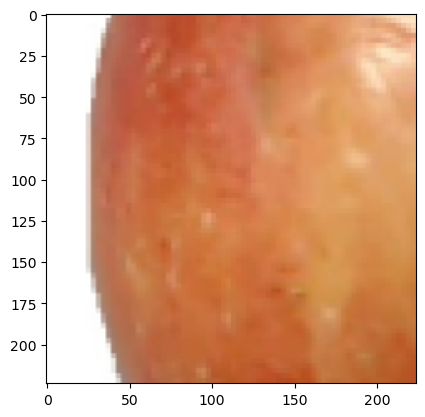

In [26]:
#### It proves that we need to sample 1 value from x_start and 1 value from y_start
## to generate random image
random_coordinates = np.random.randint(low=0 , high=3, size = 2)
loc_x = random_coordinates[0]
loc_y = random_coordinates[1]

# debug
buf_del =  x_train[0][ x_start[loc_x]:(x_start[loc_x]+width) , y_start[loc_y]:(y_start[loc_y]+height) ]
        # we cut sub pic from main photo

buf_del = cv2.resize(buf_del, (IMG_HEIGHT, IMG_WIDTH), # make all pictures standard
                         interpolation = cv2.INTER_AREA)
plt.imshow(buf_del )
## correctness confirmed

In [27]:
#### Reupload data and sample 1 sub image from each photo of target class
folder_train = r"D:\0_Desctop_Files\Learning\UTM_Project\1_Prototype\Train"
# os.listdir( folder_train )

# _y_ indicates folder with target pictures
import_train_data = [ x for x in os.listdir( folder_train ) if "_y_" in x ]

import_train_data

['apple_y_braeburn_1',
 'apple_y_crimson_snow_1',
 'apple_y_pink_lady_1',
 'apple_y_red_1',
 'apple_y_red_2',
 'apple_y_red_3',
 'apple_y_red_delicios_1',
 'apple_y_red_yellow_1']

In [28]:
img_data_array_gen_pics=[] # store pixels 
class_name_gen_pics=[] # store classes

for dir1 in import_train_data: # loop through files in each folder
    for dir2 in os.listdir ( os.path.join(folder_train, dir1) ):
         
        image_path= os.path.join(folder_train, dir1, dir2)
                        
        class_name_gen_pics.append(0)

        image= cv2.imread( image_path, cv2.IMREAD_COLOR) # import pixels of picture
        
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) # make sure that scheme is RGB
        
        image=cv2.resize(image, (IMG_HEIGHT, IMG_WIDTH), # make all pictures standard
                         interpolation = cv2.INTER_AREA)
           
        ## set coordinates for sub pic (proposal)    
        random_coordinates = np.random.randint(low=0 , high=3, size = 2)
        loc_x = random_coordinates[0]
        loc_y = random_coordinates[1]

        timage =  image[ x_start[loc_x]:(x_start[loc_x]+width) , y_start[loc_y]:(y_start[loc_y]+height) ]
        
        timage = cv2.resize(timage, (IMG_HEIGHT, IMG_WIDTH), # make all pictures standard
                                 interpolation = cv2.INTER_AREA)
        # plt.imshow(buf_del )
        
       
        img_data_array_gen_pics.append(timage) # append each picture to single structure

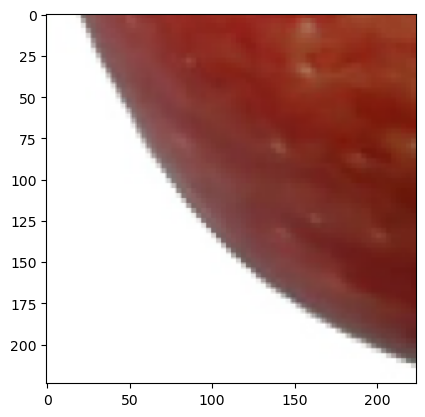

In [29]:
# debug
loc = np.random.randint( 0 , len( img_data_array_gen_pics) )
plt.imshow( img_data_array_gen_pics[loc] )

In [30]:
x_train_synt = np.array( img_data_array_gen_pics )
y_train_synt = np.array(class_name_gen_pics)
x_train_synt = x_train_synt.astype('float32')
x_train_synt /= 255

In [31]:
del img_data_array_gen_pics , class_name_gen_pics

In [32]:
x_train_synt.shape

(2467, 224, 224, 3)

In [33]:
y_train_synt.shape

(2467,)

In [34]:
##### Append to main  training dataset
x_train_synt.shape[0] + x_train.shape[0]

7627

In [35]:
# concatenate raw trainig and synthetic training data
x_train_full = np.concatenate( (x_train , x_train_synt) )
x_train_full.shape

(7627, 224, 224, 3)

In [36]:
# concatenate raw trainig and synthetic training data
y_train_full = np.concatenate( (y_train , y_train_synt) )
y_train_full.shape

(7627,)

In [37]:
sum(y_train_full) / y_train_full.shape[0] # share of 1-s , target class

0.3234561426511079

In [38]:
del y_train , x_train

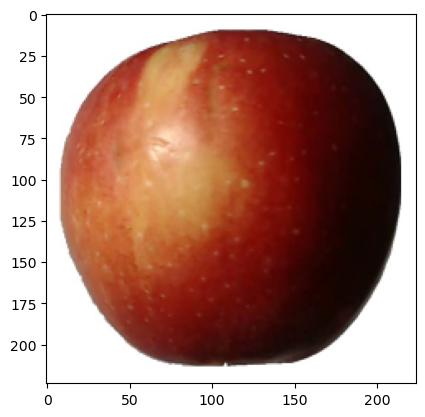

In [39]:
plt.imshow( x_train_full[0] ) # must be whole apple

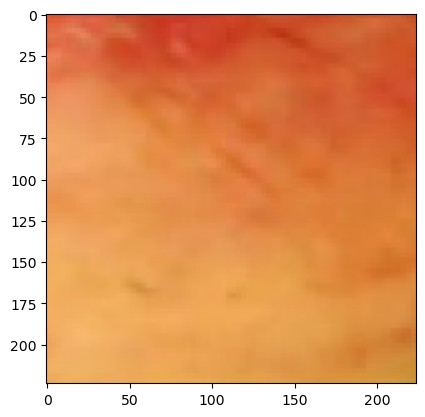

In [40]:
plt.imshow( x_train_full[ x_train_full.shape[0]-1 ] ) # must be part of apple

##### Set CNN Architecture, we expect training time to be less than 1 hour

In [41]:
#  https://www.analyticsvidhya.com/blog/2021/08/beginners-guide-to-convolutional-neural-network-with-implementation-in-python/
from keras.models import Sequential

from keras.layers import Conv2D
from keras.layers import MaxPool2D

from keras.layers import Flatten
from keras.layers import Dropout
from keras.layers import Dense

from keras.losses import binary_crossentropy

from keras.optimizers import Adam

In [72]:
# delete model if exists
try:
    del model
except:
    print("not generated")

not generated


In [77]:
# Models' design can be challenged , at prototype stage we would 
# expect low running time to make sure that fundamentals are implemented
# properly(making error fast), 
# current Architecture is based on Vgg 16 model which may take up to 1 hour per 1 epoch

# https://builtin.com/machine-learning/vgg16

In [73]:
model =  Sequential()
# we can store the model and upload it later

model.add( Conv2D(32,
                  kernel_size=(6,6),
                  activation="relu",
                  padding = "same" , 
                  input_shape = (IMG_HEIGHT,IMG_WIDTH,3) ) )

In [74]:
# model with all lined uncommented is stored however it recognises
# objects being far from red tones 

model.add(Conv2D(filters=64, kernel_size=(3,3), padding="same", activation="relu"))
#model.add(Conv2D(filters=64, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D((2, 2)))

                ## adding pooling decrease paramaters count an therefore
                ## speeds up training

model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
#model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D((2, 2)))


model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
#model.add(Conv2D(filters=256, kernel_size=(6,6), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))

## We need to flatten  before output layer
model.add(Flatten())
model.add(Dense(64, activation='relu'))

# model.add(Dropout(0.1)) # rarely included on i-net examples of CNN
model.add(Dense(1, activation='sigmoid')) # we forecast 1 class

In [75]:
opt = Adam(learning_rate=0.001) # usually its 0.001

model.compile(optimizer=opt, 
             loss=binary_crossentropy, # prob of 1 class
             metrics=['accuracy'])

In [76]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_21 (Conv2D)          (None, 224, 224, 32)      3488      
                                                                 
 conv2d_22 (Conv2D)          (None, 224, 224, 64)      18496     
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 112, 112, 64)     0         
 g2D)                                                            
                                                                 
 conv2d_23 (Conv2D)          (None, 112, 112, 128)     73856     
                                                                 
 max_pooling2d_14 (MaxPoolin  (None, 56, 56, 128)      0         
 g2D)                                                            
                                                                 
 conv2d_24 (Conv2D)          (None, 56, 56, 128)      

In [77]:
#history = model.fit(
#            x_train_full, 
#            y_train_full,
#            batch_size=52, # 
#            epochs=1,
#            verbose=1,
#            validation_split=0.2)

118/118 [==============================] - 927s 8s/step - loss: 0.1121 - accuracy: 0.9572 - val_loss: 0.0013 - val_accuracy: 1.0000


##### Now Upload Test Data to check the perfomance, accuracy of image classification, 
##### apple or other  , 1 or 0, model will forecast probabilities
##### Essentially, we verify how efficiently model can recognise single red apple, 
##### because later we would breake the test picture into multiple sub pics (proposals), 
##### looking for single apple on each of it

In [79]:
######## Store model 
# model.save(r"D:\0_Desctop_Files\Learning\UTM_Project\1_Prototype\model_v0.keras")
# model.save(r"D:\0_Desctop_Files\Learning\UTM_Project\1_Prototype\model_v1.keras")

In [80]:
# model with all lines employed 
from keras.models import load_model
# model_vo = load_model(r"D:\0_Desctop_Files\Learning\UTM_Project\1_Prototype\model_v0.keras")
model_v1 = load_model(r"D:\0_Desctop_Files\Learning\UTM_Project\1_Prototype\model_v1.keras")

In [81]:
# lists to store test pixels and classes( for accuracy check)
img_data_array_test=[]
class_name_test=[]

folder_test = r"D:\0_Desctop_Files\Learning\UTM_Project\1_Prototype\Test_Classification"
folder_test

'D:\\0_Desctop_Files\\Learning\\UTM_Project\\1_Prototype\\Test_Classification'

In [82]:
os.listdir(folder_test)

['apple_y_braeburn_1',
 'apple_y_crimson_snow_1',
 'apple_y_red_1',
 'apple_y_red_2',
 'apple_y_red_3',
 'apple_y_red_delicios_1',
 'apple_y_red_yellow_1',
 'cabbage_white_1',
 'forest_outside',
 'pear_1']

In [83]:

# we add white padding to apples as well 
# as generate sub pics of apples

for dir1 in os.listdir(folder_test): # loop through files in each folder
    for dir2 in os.listdir ( os.path.join(folder_test, dir1) ):
            
        image_path= os.path.join(folder_test, dir1,  dir2)

        image= cv2.imread( image_path, cv2.IMREAD_COLOR) # import pixels of picture
        
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) # make sure that scheme is RGB
        
        
        if dir1.split("_")[1]=="y": # if file with pictures contains "y" in name , then its 1, red apple, 0 otherwise
            class_name_test.append(1)
            image = cv2.copyMakeBorder(image, 20, 20, 20, 20, cv2.BORDER_CONSTANT, None, value=[255, 255, 255] )
               # function adds 20 white padding to picture with apple
        else:
            class_name_test.append(0)
        
        
        image=cv2.resize(image, (IMG_HEIGHT, IMG_WIDTH), # make all pictures standard
                         interpolation = cv2.INTER_AREA)
           
        img_data_array_test.append(image) # append each picture to single structure
        
        
        ## set coordinates for sub pic (proposal)    
        random_coordinates = np.random.randint(low=0 , high=3, size = 2)
        loc_x = random_coordinates[0]
        loc_y = random_coordinates[1]

        timage =  image[ x_start[loc_x]:(x_start[loc_x]+width) , y_start[loc_y]:(y_start[loc_y]+height) ]
        
        timage = cv2.resize(timage, (IMG_HEIGHT, IMG_WIDTH), # make all pictures standard
                                 interpolation = cv2.INTER_AREA)
        # plt.imshow(buf_del )
        
       
        img_data_array_test.append(timage) # append each picture to single structure
        class_name_test.append(0)



In [84]:
x_test = np.array( img_data_array_test )
y_test = np.array(class_name_test)
x_test = x_test.astype('float32')
x_test /= 255

In [85]:
x_test.shape

(3518, 224, 224, 3)

In [86]:
y_test.shape

(3518,)

In [87]:
sum(y_test) / y_test.shape[0]

0.3058555997725981

In [88]:
y_test

array([1, 0, 1, ..., 0, 0, 0])

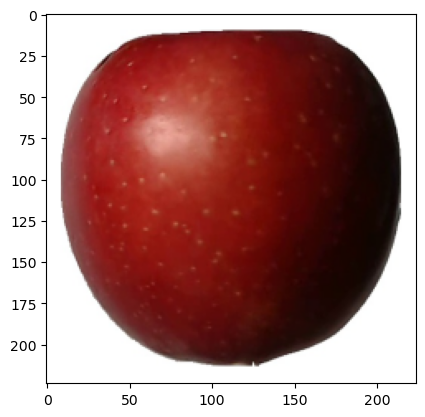

In [89]:
plt.imshow( x_test[0] ) # debug

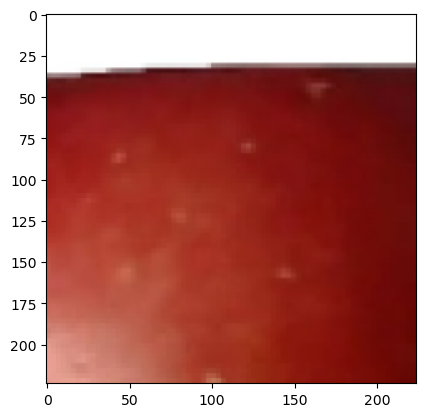

In [90]:
plt.imshow( x_test[1] )  # debug

In [91]:
## Generate forecast with test data
out = model.predict( x_test ) 

110/110 [==============================] - 79s 715ms/step


In [92]:
# Libraries for accuracy metrics 

from sklearn.metrics import confusion_matrix # requires counts , integers , 1 or 0
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score


In [93]:
out # debug

array([[1.00000000e+00],
       [1.18257496e-07],
       [1.00000000e+00],
       ...,
       [3.28198013e-07],
       [1.25887762e-08],
       [5.19507296e-07]], dtype=float32)

In [94]:
np.unique( np.round(out,2) ) # debug , should be probabilities

array([0.  , 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 ,
       0.11, 0.13, 0.14, 0.15, 0.16, 0.18, 0.19, 0.21, 0.23, 0.24, 0.27,
       0.33, 0.34, 0.44, 0.47, 0.48, 0.49, 0.5 , 0.54, 0.55, 0.59, 0.62,
       0.66, 0.71, 0.74, 0.77, 0.81, 0.85, 0.86, 0.92, 0.94, 0.98, 0.99,
       1.  ], dtype=float32)

In [95]:
out_classes = ( out >= 0.8 ) + 0 # to whole numbers , 
out_classes

array([[1],
       [0],
       [1],
       ...,
       [0],
       [0],
       [0]])

In [96]:
np.unique( np.round(out_classes,2) )

array([0, 1])

In [97]:
confusion_matrix( y_test , out_classes)

array([[2433,    9],
       [   0, 1076]], dtype=int64)

In [98]:
f1_score( y_test , out_classes)

0.9958352614530309

In [99]:
accuracy_score( y_test , out_classes) 
 ## We commented part of model and increased accuracy and f1 score , both by apr. 5%

0.9974417282546901

In [100]:
recall_score( y_test , out_classes)

1.0

In [101]:
accuracy_score( y_test , out_classes)

0.9974417282546901

##### Script below seeks to implement R-CNN method for object detection, 
##### idea is to breake picture into smaller sub pics (proposals)
##### and use previously trained model to check if sub pic contains apple
#####
##### R-CNN would be implemented via switchToSelectiveSearchFast() method
#####
##### !!! We may not require to manually label apples on each picture
##### because training dataset already contains picture of single apple
#####
##### Now, apply switchToSelectiveSearchFast() to verify if algo can operate over 1 picture , 
##### switchToSelectiveSearchFast() allows to breake picture into small 
##### pics and check if apple is present on the respective piece

In [102]:
## Import picture with multiple apples

img_data_array_test=[]
class_name_test=[]

folder_test = r"D:\0_Desctop_Files\Learning\UTM_Project\Test_Object_Detection"

In [103]:
## focus on 1 picture
## we want to explore functionality of switchToSelectiveSearchFast()

debug_photo_1 = r"D:\0_Desctop_Files\Learning\UTM_Project\1_Prototype\Test_Object_Detection\apple_6.jpg" # apple_6.jpg 4 apples 
debug_photo_2 = r"D:\0_Desctop_Files\Learning\UTM_Project\1_Prototype\Test_Object_Detection\apple_4.jpg" # apple_4.jpg 2 apples

In [104]:
# initiate class
ss = cv2.ximgproc.segmentation.createSelectiveSearchSegmentation()

# upload image for experiment
image_1= cv2.imread( debug_photo_1, cv2.IMREAD_COLOR)
image_2= cv2.imread( debug_photo_2, cv2.IMREAD_COLOR)

image_1=cv2.resize(image_1, (IMG_HEIGHT, IMG_WIDTH), interpolation = cv2.INTER_AREA)
image_2=cv2.resize(image_2, (IMG_HEIGHT, IMG_WIDTH), interpolation = cv2.INTER_AREA)

# maintain RGB scheme
image_1 = cv2.cvtColor(image_1, cv2.COLOR_BGR2RGB)
image_2 = cv2.cvtColor(image_2, cv2.COLOR_BGR2RGB)

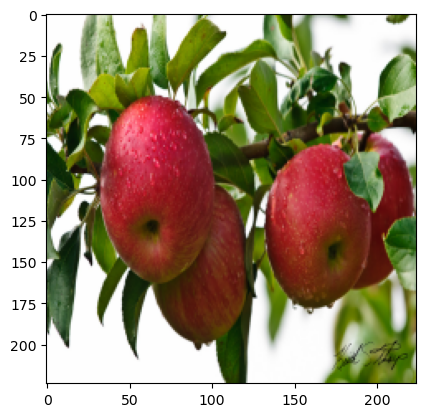

In [105]:
plt.imshow( image_1 ) # now , ideally , we want to detect each apple 
# on picture

In [106]:
# genenerate coordinats of sub picture( proposal )
ss.setBaseImage( image_1 ) # we  define image we want to breake into smaller pics

ss.switchToSelectiveSearchQuality() # we initiate method to breake the main picture
#  switchToSelectiveSearchQuality , switchToSelectiveSearchFast

ssresults = ss.process() # we generate coordidates of sub pics 

# https://pyimagesearch.com/2020/06/29/opencv-selective-search-for-object-detection/

In [107]:
len(ssresults) # did not found how to set number of proposals manually
               # larger the image, more proposals are generated, longer the detection process
               # however, we can limit number of proposals used

3023

In [108]:
x,y,w,h = ssresults[0] # x ,y , width and height, we will cut
 # this part from uploaded main picture

In [109]:
imout = image_1.copy()

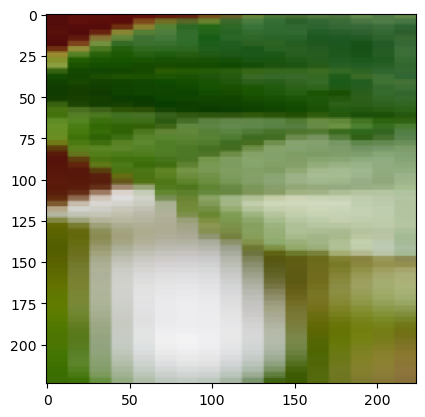

In [110]:
timage = imout[y:y+h,x:x+w] # we cut smaller sub pic

# scale sub pic to fit input requirements
resized = cv2.resize(timage, (224,224), interpolation = cv2.INTER_AREA)

plt.imshow( resized ) # visulise piece of initial picture

In [111]:
resized.shape # need to add batch size 

(224, 224, 3)

In [112]:
resized = np.expand_dims(resized, axis=0) #
resized.shape # np.expand_dims(resized, axis=0) generates batch size

(1, 224, 224, 3)

In [113]:
# does the sub pic contains picture of apple ,
# as argued by our previously trained model ?

out= model.predict(resized) # model was trained before
out # if more than 70% than apple

1/1 [==============================] - 0s 152ms/step


array([[0.]], dtype=float32)

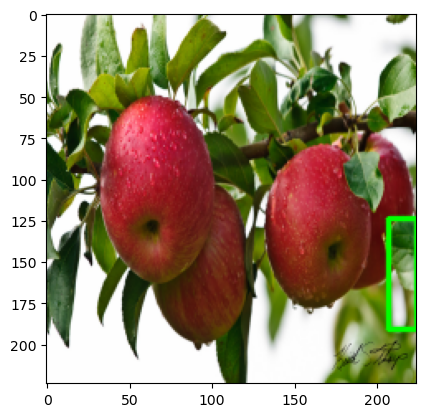

In [114]:
# script below generates small rectangle which represent sub pic
cv2.rectangle(imout, (x, y), (x+w, y+h), (0, 255, 0), 2, cv2.LINE_AA)
plt.figure()
plt.imshow(imout)

#### Now produce example for all pics derived from uploaded main picture 

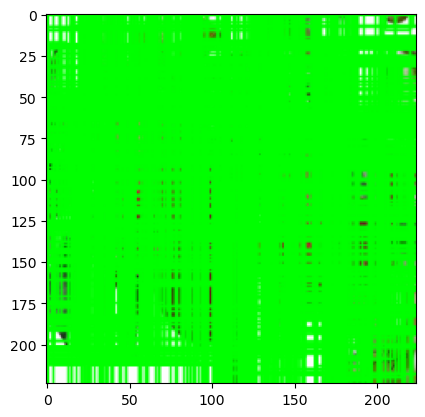

In [115]:
## We ask to highlight pics checked by model which definately 
## DO NOT represent FULL apple (whole apple , not piece it)

imout = image_1.copy()

for count ,result in enumerate(ssresults): 
      if count <=2500:
                x,y,w,h = result
                timage = imout[y:y+h,x:x+w] # this is sub pic, cut from main image
                resized = cv2.resize(timage, ( IMG_WIDTH,IMG_HEIGHT ), interpolation = cv2.INTER_AREA)
                img = np.expand_dims(resized, axis=0)
                
                # generate prediction for single sub pic
                out= model.predict(img, verbose = 0) # verbose of 1 will produce messahe for each proposal, not convenient
                
                if out[0][0] <= 0.1: # less that 10% that apple is on sub pic (proposal)
                    cv2.rectangle(imout, (x, y), (x+w, y+h), (0, 255, 0), 1, cv2.LINE_AA)
                     # code above draws rectangles on main picture
plt.figure()
plt.imshow(imout)

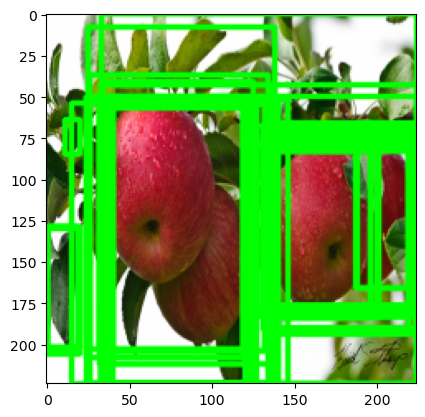

In [116]:
imout = image_1.copy() # need to refresh picture, because prev script draw rectangles over it

## We ask to highlight pics checked by model which most probably 
## DO represent FULL apple (whole apple , not piece it)

## Ideally , we would expect limited number of highlighted areas
## intersected with apple part of picture indicating that model design is on track

for count ,result in enumerate(ssresults): 
            
         if count <=2500:
                x,y,w,h = result
                timage = imout[y:y+h,x:x+w]
                resized = cv2.resize(timage, ( IMG_WIDTH,IMG_HEIGHT ), interpolation = cv2.INTER_AREA)
                img = np.expand_dims(resized, axis=0)
                
                # generate prediction for single sub pic
                out= model.predict(img, verbose = 0)
                
                if out[0][0] >= 0.9: # definetely as apple, as argued by model
                    cv2.rectangle(imout, (x, y), (x+w, y+h), (0, 255, 0), 2, cv2.LINE_AA)
plt.figure()
plt.imshow(imout)

In [88]:
# Possible Directions:

#  Increase complexity of model , however , full VGG16 performs worser compare to 
  # version in current notebook , maybe use pretrained VGG16 available in Keras

#  Add pics of apples parts as 0 labels and focus on full 
   # object , form + colour
    
# add threshhold to colors (threshhold for RGB) , change non red to white
# cv2.inRange

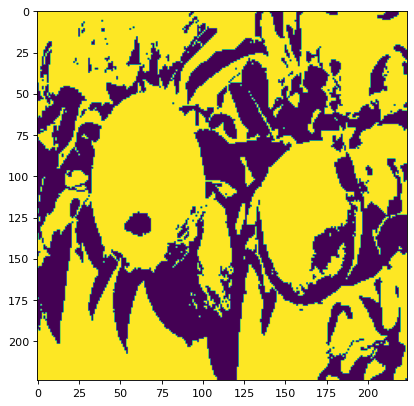

In [117]:
###### How we can preprocess picture to highligh Red color

red_apples =  image_1.copy()

red_filtered_apples = (red_apples[:,:,0] > 100) # 0 for Red in RGB
plt.figure(num=None, figsize=(8, 6), dpi=80)
plt.imshow(red_filtered_apples);

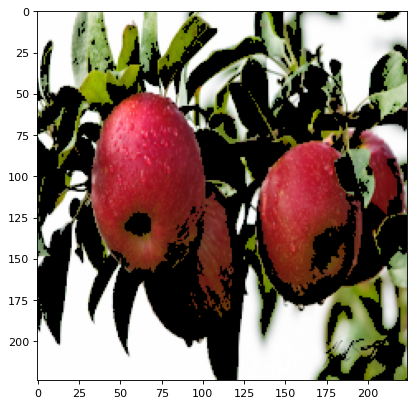

In [118]:
red_apples_new = image_1.copy()
red_apples_new[:, :, 0] = red_apples_new[:, :, 0]*red_filtered_apples
red_apples_new[:, :, 1] = red_apples_new[:, :, 1]*red_filtered_apples
red_apples_new[:, :, 2] = red_apples_new[:, :, 2]*red_filtered_apples
plt.figure(num=None, figsize=(8, 6), dpi=80)
plt.imshow(red_apples_new);

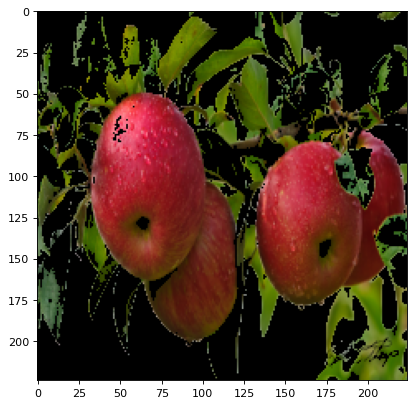

In [134]:
red_apples = image_1.copy()
red_filtered = (red_apples[:,:,0] > 50) & (red_apples[:,:,1] < 150) & (red_apples[:,:,2] < 150)
plt.figure(num=None, figsize=(8, 6), dpi=80)

red_apples_new = image_1.copy()
red_apples_new[:, :, 0] = red_apples_new[:, :, 0] * red_filtered
red_apples_new[:, :, 1] = red_apples_new[:, :, 1] * red_filtered
red_apples_new[:, :, 2] = red_apples_new[:, :, 2] * red_filtered
plt.imshow(red_apples_new);
# http://www.workwithcolor.com/red-color-hue-range-01.htm

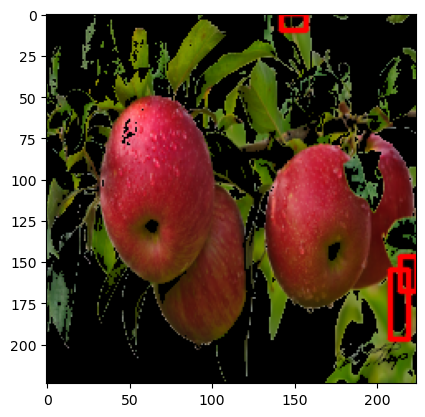

In [135]:
ss.setBaseImage( red_apples_new )
ss.switchToSelectiveSearchQuality() 
ssresults = ss.process() 

imout = red_apples_new.copy() # need to refresh picture, because prev script draw rectangles over it

for count ,result in enumerate(ssresults): 
    
    if count <=2500:
            
                x,y,w,h = result
                timage = imout[y:y+h,x:x+w]
                resized = cv2.resize(timage, ( IMG_WIDTH,IMG_HEIGHT ), interpolation = cv2.INTER_AREA)
                img = np.expand_dims(resized, axis=0)
                
                # generate prediction for single sub pic
                out= model.predict(img, verbose = 0)
                
                if out[0][0] >= 0.9: # definetely as apple, as argued by model
                    cv2.rectangle(imout, (x, y), (x+w, y+h), (255, 0, 0), 2, cv2.LINE_AA)
plt.figure()
plt.imshow(imout)

## Low accuracy of detection , could be due to fact that we use white padding 
## !!!Try black padding


In [121]:
# Verify object detection on another image, actial branch of tree with apples
# genenerate coordinats of sub picture( proposal )
ss.setBaseImage( image_2 ) # we  define image we want to breake into smaller pics

ss.switchToSelectiveSearchQuality() 

ssresults = ss.process() 

# https://pyimagesearch.com/2020/06/29/opencv-selective-search-for-object-detection/

len( ssresults ) # number of proposals, larger the number , longer the training, 
                 # unless we limit number of proposals employed

915

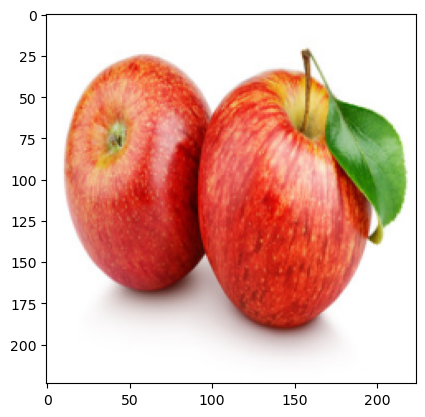

In [122]:
plt.imshow( image_2 )

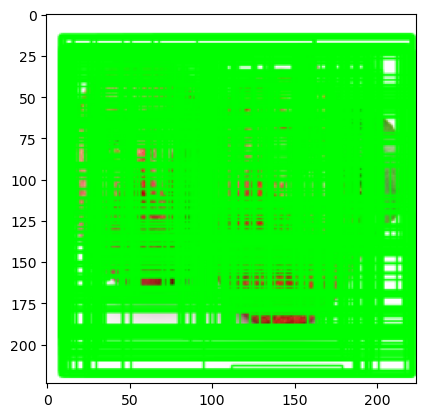

In [123]:
## We ask to highlight pics checked by model which definately 
## DO NOT represent FULL apple (whole apple , not piece it)

imout = image_2.copy()

for count ,result in enumerate(ssresults): # loop through coordinates of each sub pic
         
        if count <=2500:
            
                x,y,w,h = result
                timage = imout[y:y+h,x:x+w] # this is sub pic, cut from main image
                resized = cv2.resize(timage, ( IMG_WIDTH,IMG_HEIGHT ), interpolation = cv2.INTER_AREA)
                img = np.expand_dims(resized, axis=0)
                
                # generate prediction for single sub pic
                out= model.predict(img, verbose = 0)
                
                if out[0][0] <= 0.1: # less that 10% that apple is on sub pic (proposal)
                    cv2.rectangle(imout, (x, y), (x+w, y+h), (0, 255, 0), 1, cv2.LINE_AA)
                     # code above draws rectangles on main picture
plt.figure()
plt.imshow(imout)

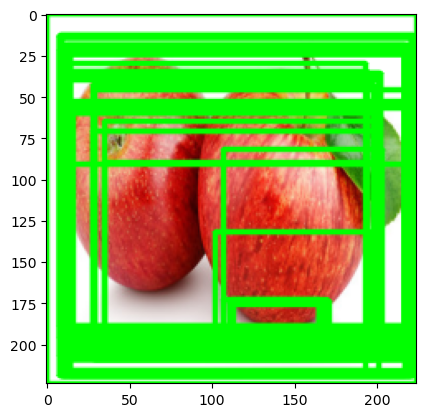

In [133]:

imout = image_2.copy() # need to refresh picture, because prev script draw rectangles over it

for count,result in enumerate(ssresults):

    if count <=2500:
        
                x,y,w,h = result
                timage = imout[y:y+h,x:x+w]
                resized = cv2.resize(timage, ( IMG_WIDTH,IMG_HEIGHT ), interpolation = cv2.INTER_AREA)
                img = np.expand_dims(resized, axis=0)
                
                # generate prediction for single sub pic
                out= model.predict(img, verbose = 0)
                
                if out[0][0] >= 0.8: # definetely as apple, as argued by model
                    cv2.rectangle(imout, (x, y), (x+w, y+h), (0, 255, 0), 2, cv2.LINE_AA)
plt.figure()
plt.imshow(imout)
